In [1]:
from pathlib import Path
import numpy as np
import xarray as xr

In [2]:
data_path = Path("../echopype/test_data/ad2cp_output/")
file_path = data_path / "rawtest.090.00015.nc"

In [3]:
import echopype as ep

In [4]:
raw_file = "../echopype/test_data/ad2cp/rawtest.090.00015_new.ad2cp"

In [5]:
ep.__version__

'0.5.6.dev53+g62c3d1fb.d20220426'

In [6]:
ed = ep.open_raw(raw_file=raw_file, sonar_model="AD2CP")

In [7]:
ed

<EchoData: standardized raw data from Internal Memory>
Top-level: contains metadata about the SONAR-netCDF4 file format.
├── Environment: contains information relevant to acoustic propagation through water.
├── Platform: contains information about the platform on which the sonar is installed.
├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
├── Sonar: contains sonar system metadata and sonar beam groups.
│   └── Beam_group1: contains backscatter data (either complex samples or uncalibrated power samples) and other beam or channel-specific data, including split-beam angle data when they exist.
└── Vendor_specific: contains vendor-specific information about the sonar and the data.

## Top-level

In [20]:
xr.open_dataset(file_path)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    conventions:                 CF-1.7, SONAR-netCDF4-1.0, ACDD-1.3
    keywords:                    AD2CP
    sonar_convention_authority:  ICES
    sonar_convention_name:       SONAR-netCDF4
    sonar_convention_version:    1.0
    summary:                     
    title:                       
    date_created:                2021-03-31T14:30:11Z
    survey_name:

## Sonar group

In [21]:
xr.open_dataset(file_path, group="Sonar")

<xarray.Dataset>
Dimensions:           (beam_group: 1)
Coordinates:
  * beam_group        (beam_group) object 'Beam_group1'
Data variables:
    beam_group_descr  (beam_group) object ...
Attributes:
    sonar_serial_number:     
    sonar_manufacturer:      Nortek
    sonar_model:             AD2CP
    sonar_software_name:     
    sonar_software_version:  
    sonar_firmware_version:  FW:2214, FPGA:185, DIGITAL:I-3, INTERFACE:H-0, A...
    sonar_type:              acoustic Doppler current profiler (ADCP)

## Beam group

In [22]:
ds_beam = xr.open_dataset(file_path, group="Sonar/Beam_group1")

In [23]:
ds_beam

<xarray.Dataset>
Dimensions:                             (ping_time: 277,
                                         ping_time_echosounder: 276,
                                         range_sample_echosounder: 650)
Coordinates:
  * ping_time_echosounder               (ping_time_echosounder) datetime64[ns] ...
  * ping_time                           (ping_time) datetime64[ns] 2021-03-31...
  * range_sample_echosounder            (range_sample_echosounder) int64 0 .....
Data variables: (12/30)
    number_of_beams                     float64 ...
    coordinate_system                   float64 ...
    number_of_cells                     float64 ...
    blanking                            (ping_time) float64 ...
    cell_size                           (ping_time) float64 ...
    velocity_range                      float64 ...
    ...                                  ...
    ast_offset_100us                    float64 ...
    ast_pressure                        float64 ...
    altimeter_spare                     float64 ...
    altimeter_raw_data_num_samples      float64 ...
    altimeter_raw_data_sample_distance  float64 ...
    altimeter_raw_data_samples          float64 ...
Attributes:
    pulse_compressed:  1

## Vendor group

In [24]:
ds_vend = xr.open_dataset(file_path, group="Vendor_specific")

In [25]:
ds_vend

<xarray.Dataset>
Dimensions:                             (ping_time: 277,
                                         ping_time_echosounder_raw: 92,
                                         sample: 943,
                                         ping_time_echosounder_raw_transmit: 1,
                                         sample_transmit: 125)
Coordinates:
  * ping_time_echosounder_raw           (ping_time_echosounder_raw) datetime64[ns] ...
  * ping_time_echosounder_raw_transmit  (ping_time_echosounder_raw_transmit) datetime64[ns] ...
  * ping_time                           (ping_time) datetime64[ns] 2021-03-31...
  * sample                              (sample) int64 0 1 2 3 ... 940 941 942
  * sample_transmit                     (sample_transmit) int64 0 1 ... 123 124
Data variables: (12/29)
    data_record_version                 (ping_time) uint8 ...
    error                               (ping_time) uint16 ...
    status                              (ping_time) uint32 ...
    status0                             (ping_time) uint16 ...
    battery_voltage                     (ping_time) float64 ...
    power_level                         (ping_time) int8 ...
    ...                                  ...
    echosounder_raw_samples_i           (ping_time_echosounder_raw, sample) float64 ...
    echosounder_raw_samples_q           (ping_time_echosounder_raw, sample) float64 ...
    echosounder_raw_transmit_samples_i  (ping_time_echosounder_raw_transmit, sample_transmit) float64 ...
    echosounder_raw_transmit_samples_q  (ping_time_echosounder_raw_transmit, sample_transmit) float64 ...
    echosounder_raw_beam                (ping_time) uint64 ...
    echosounder_raw_echogram            (ping_time) uint64 ...
Attributes:
    pulse_compressed:  1

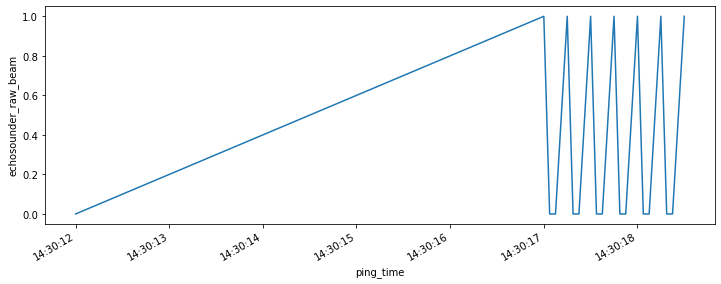

In [26]:
ds_vend["echosounder_raw_beam"].isel(ping_time=slice(None, 20)).plot(figsize=(12,4))

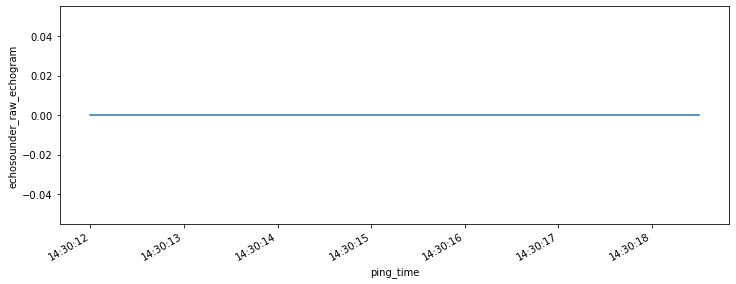

In [27]:
ds_vend["echosounder_raw_echogram"].isel(ping_time=slice(None, 20)).plot(figsize=(12,4))

## Environment group

In [28]:
ds_env = xr.open_dataset(file_path, group="Environment")

In [29]:
ds_env

<xarray.Dataset>
Dimensions:                 (ping_time: 277)
Coordinates:
  * ping_time               (ping_time) datetime64[ns] 2021-03-31T14:30:12 .....
Data variables:
    sound_speed_indicative  (ping_time) float64 ...
    temperature             (ping_time) float64 ...
    pressure                (ping_time) float64 ...

## Provenance group

In [30]:
ds_prov = xr.open_dataset(file_path, group="Provenance")

In [31]:
ds_prov

<xarray.Dataset>
Dimensions:           (filenames: 1)
Dimensions without coordinates: filenames
Data variables:
    source_filenames  (filenames) object ...
Attributes:
    conversion_software_name:     echopype
    conversion_software_version:  0.6.0
    conversion_time:              2022-06-05T16:24:14Z

## Platform group

In [32]:
ds_plat = xr.open_dataset(file_path, group="Platform")

In [33]:
ds_plat

<xarray.Dataset>
Dimensions:           (ping_time: 277, xyz: 3)
Coordinates:
  * ping_time         (ping_time) datetime64[ns] 2021-03-31T14:30:12 ... 2021...
  * xyz               (xyz) object 'x' 'y' 'z'
Data variables:
    heading           (ping_time) float64 ...
    pitch             (ping_time) float64 ...
    roll              (ping_time) float64 ...
    magnetometer_raw  (ping_time, xyz) int16 ...
Attributes:
    platform_name:       
    platform_type:       
    platform_code_ICES:

In [34]:
list(ds_plat.variables)

['heading', 'pitch', 'roll', 'magnetometer_raw', 'ping_time', 'xyz']